In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Drug dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

https://www.kaggle.com/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees

In [3]:
# Import the dataset
data = pd.read_csv("data/drugs.csv")
# Show the first few rows
data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [4]:
# Look at the total amount of rows and columns
data.shape

(200, 6)

<Axes: xlabel='Drug', ylabel='count'>

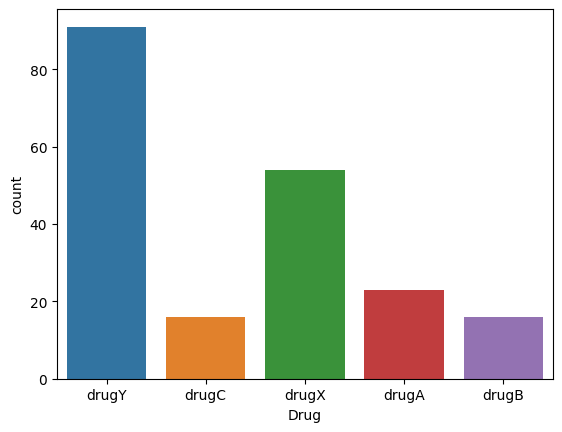

In [5]:
# Show the distribution of the target column
sns.countplot(data, x = "Drug")

In [6]:
# Split into features and target
X = data.drop("Drug", axis = 1)
y = data["Drug"]

In [7]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [10]:
# Find a way to change the categorical (text) features into numeric features.
# Different options are available. The best one being LabelEncoder():
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# 
# Other options are one-hot encoding and pd.get_dummies functions
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
LabelEnc = LabelEncoder()

X.Sex = LabelEnc.fit_transform(X.Sex)
X.BP = LabelEnc.fit_transform(X.BP)
X.Cholesterol = LabelEnc.fit_transform(X.Cholesterol)

In [11]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [12]:
# Split into a training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [14]:
# Create a random forest classifier model. Set max_depth parameter to 2
# You also might wanna play with the class_weight parameter
For = RandomForestClassifier(max_depth=2, class_weight='balanced')
# Fit the model
For.fit(X_train, y_train)
# Print the score on the test set
print("The score of the training set: ",For.score(X_train, y_train))
print("The score of the test set: ",For.score(X_test, y_test))

The score of the training set:  0.9626865671641791
The score of the test set:  0.9090909090909091


TEST SET

Classification report 
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         4
       drugC       0.40      1.00      0.57         4
       drugX       1.00      0.71      0.83        21
       drugY       1.00      1.00      1.00        31

    accuracy                           0.91        66
   macro avg       0.88      0.94      0.88        66
weighted avg       0.96      0.91      0.92        66



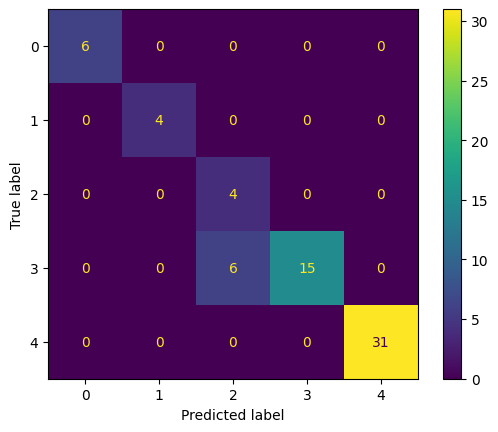

TRAIN SET

Classification report 
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        17
       drugB       1.00      1.00      1.00        12
       drugC       0.71      1.00      0.83        12
       drugX       1.00      0.85      0.92        33
       drugY       1.00      1.00      1.00        60

    accuracy                           0.96       134
   macro avg       0.94      0.97      0.95       134
weighted avg       0.97      0.96      0.96       134



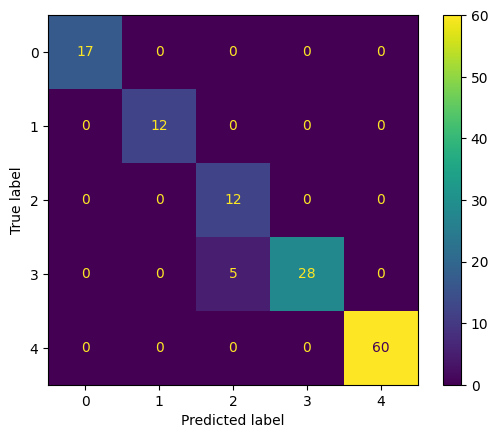

In [25]:
# Predict values for the test set
y_pred_test = For.predict(X_test)
y_pred_train = For.predict(X_train)

# Print a confusion matrix and classification report
print("TEST SET")
print("\nClassification report \n",classification_report(y_test, y_pred_test))

cf_test = confusion_matrix(y_test,y_pred_test)
matrix = ConfusionMatrixDisplay(cf_test)
matrix.plot()
plt.show()
print("TRAIN SET")
print("\nClassification report \n",classification_report(y_train, y_pred_train))

cf_train = confusion_matrix(y_train,y_pred_train)
matrix = ConfusionMatrixDisplay(cf_train)
matrix.plot()
plt.show()

## Hyperparameter optimizations
Use a grid, random or bayes search to do some hyperparameter optimizations.

For possible hyperparameters to tune, take a look at the documentation of random forest trees:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Keep max_depth at 1 and/or 2, as otherwise, your tree would get everything right in the training set.

Note there is not really a right answer. It's just about trying different things and seeing if you can implement a search yourself.

In [26]:
from sklearn.model_selection import GridSearchCV

In [28]:
# Optimizations
ForModel=RandomForestClassifier() # Default penalty is l2
# All the parameters we want to test
parameters = [{"n_estimators":[100, 200, 500, 1000],  
               "criterion":["gini", "entropy"],
               "max_depth":[2, 4, 8, None],
               "class_weight":["balanced", None]
              }] 

# Constructing the grid search "model"
grid_search = GridSearchCV(estimator=ForModel,
                           n_jobs=-1, 
                           cv = 5,
                           param_grid=parameters,             
                           verbose=4
                           )
# Fit the training data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', None],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 4, 8, None],
                          'n_estimators': [100, 200, 500, 1000]}],
             verbose=4)

In [29]:
# Print the score of the best model of your search
# Print the score on test set (best model of our grid search)
print(f"Score of best model: {grid_search.score(X_test,y_test)}")

# Predict values for test set for best model
y_pred=grid_search.predict(X_test)

# Print classification report
print("\nClassification report:")
print(classification_report(y_test,y_pred))

# What where the best parameters for out model?
print("\nBest parameters:")
print(grid_search.best_params_)
print(grid_search.best_estimator_)

Score of best model: 1.0

Classification report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        21
       drugY       1.00      1.00      1.00        31

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66


Best parameters:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'n_estimators': 200}
RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=200)


## Boosting
Try now to also create a boosted model for the random forest trees and test the model.

In [30]:
from sklearn.ensemble import AdaBoostClassifier
# When not specifying a specific base estimator, a DecisionTreeClassifier is used (One tree). 
clf_adaboost = AdaBoostClassifier(n_estimators=150,learning_rate=0.9)
# Fit data
clf_adaboost.fit(X_train,y_train)
# Predict testing data
y_pred = clf_adaboost.predict(X_test)

# Print the scores
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.60      1.00      0.75         6
       drugB       0.00      0.00      0.00         4
       drugC       0.00      0.00      0.00         4
       drugX       0.84      1.00      0.91        21
       drugY       1.00      1.00      1.00        31

    accuracy                           0.88        66
   macro avg       0.49      0.60      0.53        66
weighted avg       0.79      0.88      0.83        66

[[ 6  0  0  0  0]
 [ 4  0  0  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0 21  0]
 [ 0  0  0  0 31]]


C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [33]:
# Similarly to bagging, we can also use for example logistic regression or naive bayes
Complexity=10
baseModel= LogisticRegression(C=Complexity, solver='liblinear')
clf_adaboost = AdaBoostClassifier(base_estimator=baseModel, n_estimators=150,learning_rate=0.01)
# Fit data
clf_adaboost.fit(X_train,y_train)
# Predict testing data
y_pred = clf_adaboost.predict(X_test)

# Print the scores
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

       drugA       1.00      0.33      0.50         6
       drugB       0.60      0.75      0.67         4
       drugC       0.00      0.00      0.00         4
       drugX       0.83      0.90      0.86        21
       drugY       0.83      0.97      0.90        31

    accuracy                           0.82        66
   macro avg       0.65      0.59      0.59        66
weighted avg       0.78      0.82      0.78        66

[[ 2  1  0  0  3]
 [ 0  3  0  0  1]
 [ 0  1  0  3  0]
 [ 0  0  0 19  2]
 [ 0  0  0  1 30]]


C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,